In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/NO2normalization.csv
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/O3normalization.csv
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/pm2.5try.csv
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/City_max_mincsv.csv

--2021-07-28 11:21:49--  https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/NO2normalization.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3117 (3.0K) [text/plain]
Saving to: ‘NO2normalization.csv’

NO2normalization.cs 100%[===================>]   3.04K  --.-KB/s    in 0s      

2021-07-28 11:21:49 (33.6 MB/s) - ‘NO2normalization.csv’ saved [3117/3117]

--2021-07-28 11:21:49--  https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/O3normalization.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [ ]:
from csv import reader
import math
print("pm2.5")
datasetpm25 = []

with open('pm2.5try.csv', 'r') as file:
    csv_reader = reader(file, delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        datasetpm25.append(arr)


datasetno2 = []
with open('NO2normalization.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        datasetno2.append(arr)


dataseto3 = []
with open('O3normalization.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        arr = [row[0], row[1], row[2], row[3], row[4], row[5],row[6], row[7], row[8], row[9], row[10]]
        dataseto3.append(arr)

pm2.5


In [ ]:
dataset = []

for city in range(len(datasetpm25)):
  data_city = []
  data_xpm25 = []
  data_ypm25 = []
  data_xno2 = []
  data_yno2 = []
  data_xo3 = []
  data_yo3 = [] 
  for index in range(len(datasetpm25[city])-5):
    data_xpm25.append(datasetpm25[city][index+1:index+5])
    data_ypm25.append(datasetpm25[city][index+5])
  for index in range(len(datasetno2[city])-5):
    data_xno2.append(datasetno2[city][index+1:index+5])
    data_yno2.append(datasetno2[city][index+5])
  for index in range(len(dataseto3[city])-5):
    data_xo3.append(dataseto3[city][index+1:index+5])
    data_yo3.append(dataseto3[city][index+5])
  
  data_pm25 = (np.array(data_xpm25).astype(float),np.array(data_ypm25).astype(float))
  data_city.append(data_pm25)

  data_no2 = (np.array(data_xno2).astype(float),np.array(data_yno2).astype(float))
  data_city.append(data_no2)

  data_o3 = (np.array(data_xo3).astype(float),np.array(data_yo3).astype(float))
  data_city.append(data_o3)
  
  dataset.append(data_city)

print(dataset[0][0])

(array([[1.        , 0.76052632, 0.93947368, 0.60263158],
       [0.76052632, 0.93947368, 0.60263158, 0.48684211],
       [0.93947368, 0.60263158, 0.48684211, 0.53157895],
       [0.60263158, 0.48684211, 0.53157895, 0.52368421],
       [0.48684211, 0.53157895, 0.52368421, 0.13157895],
       [0.53157895, 0.52368421, 0.13157895, 0.12368421]]), array([0.48684211, 0.53157895, 0.52368421, 0.13157895, 0.12368421,
       0.        ]))


In [ ]:
networks = []
loss_graphs = []
for city in range(len(dataset)):
  net_city = []
  loss_city = []
  for index, indicator in enumerate(dataset[city]):

    net = torch.nn.Sequential(
            torch.nn.Linear(4, 200),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(200, 100),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(100, 1),
        )
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

    BATCH_SIZE = 1
    EPOCH = 20


    x = torch.FloatTensor(indicator[0])
    y = torch.FloatTensor(indicator[1])

    torch_dataset = Data.TensorDataset(x, y)

    loader = Data.DataLoader(
        dataset=torch_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=True, num_workers=2,)

    loss_values = []

    # start training
    for epoch in range(EPOCH):
        for step, (batch_x, batch_y) in enumerate(loader): # for each training step
            
            b_x = Variable(batch_x)
            b_y = Variable(batch_y)

            prediction = net(b_x)     # input x and predict based on x

            loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

            optimizer.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            optimizer.step()        # apply gradients
            loss_values.append(loss)

    net_city.append(net)
    loss_city.append(loss_values)

  networks.append(net_city)
  loss_graphs.append(loss_city)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


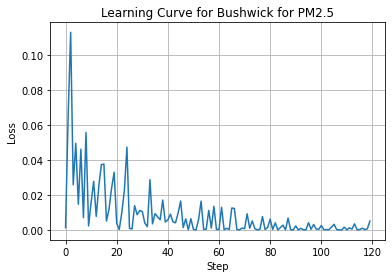

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_graphs[5][0])
plt.title('Learning Curve for Bushwick for PM2.5')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid('on')

In [ ]:
cities_max_min = []
with open('City_max_mincsv.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        row = [h.replace(',','.') for h in row]
        arr = [row[0], float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6])]
        cities_max_min.append(arr)
print(cities_max_min)

[['Bronx', 11.05, 7.25, 24.52, 17.73, 34.61, 25.3], ['Brooklyn', 10.5, 7.19, 24.11, 17.83, 33.98, 26.27], ['Bedford Stuyvesant (CD3)', 10.84, 7.38, 27.55, 19.99, 32.55, 23.92], ['Bensonhurst (CD11)', 9.84, 6.72, 23.01, 17.08, 34.91, 27.36], ['Brownsville (CD16)', 10.78, 7.36, 25.63, 18.8, 33.74, 25.39], ['Bushwick (CD4)', 10.81, 7.51, 25.88, 19.47, 33.47, 25.32], ['Central Harlem (CD10)', 11.55, 7.5, 31.17, 21.72, 31.8, 21.56], ['Coney Island (CD13)', 9.43, 6.53, 18.41, 13.63, 37.9, 30.59], ['Financial District (CD1)', 13.05, 8.97, 36.62, 25.32, 29.81, 19.11], ['Fresh Meadows', 10.0, 6.55, 22.78, 17.34, 33.38, 25.43], ['Jackson Heights (CD3)', 10.26, 6.88, 25.64, 19.09, 33.72, 25.51], ['Manhattan', 12.63, 8.46, 33.89, 23.43, 30.3, 20.44], ['Midtown (CD5)', 16.09, 10.92, 46.75, 31.1, 26.92, 14.38], ['New York City', 10.43, 7.0, 22.72, 17.0, 33.83, 26.0], ['Port Richmond', 10.22, 6.78, 21.35, 16.77, 33.42, 24.42], ['Queens', 10.05, 6.82, 22.19, 17.18, 34.5, 26.85], ['Staten Island', 9.81

In [ ]:
def invert_normalization(prediction,max,min):
  return prediction*(max-min)+min 

def normalize(arr,max,min):
  return [(value-min)/(max-min) for value in arr ]

def predict(arr,net,max,min,n_year):
  predictions = []
  for year in range(n_year):
    arr_normalized = np.array(normalize(arr,max,min))
    arr_tensor = torch.FloatTensor(arr_normalized)
    prediction_normalized = net(arr_tensor)
    prediction = invert_normalization(prediction_normalized,max,min)
    predictions.append(float(prediction))
    arr = arr[1:]
    arr.append(float(prediction))
  return predictions

In [ ]:
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/pm2.5.csv
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/O3.csv
!wget https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/NO2.csv

--2021-07-28 11:23:04--  https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/pm2.5.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988 [text/plain]
Saving to: ‘pm2.5.csv’

pm2.5.csv           100%[===================>]     988  --.-KB/s    in 0s      

2021-07-28 11:23:05 (36.8 MB/s) - ‘pm2.5.csv’ saved [988/988]

--2021-07-28 11:23:05--  https://raw.githubusercontent.com/kececidilara/MLTERMPROJECT/main/O3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131 (1.1K) [text/plain]
Saving to: ‘O3.csv’

O3.csv    

In [ ]:
dataset_original = []
dataset_original_pm25 = []
with open('pm2.5.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        row = [h.replace(',','.') for h in row]
        arr = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9])]
        dataset_original_pm25.append(arr)
dataset_original.append(dataset_original_pm25)
dataset_original_no2 = []
with open('NO2.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        row = [h.replace(',','.') for h in row]
        arr = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9])]
        dataset_original_no2.append(arr)
dataset_original.append(dataset_original_no2)
dataset_original_o3 = []
with open('O3.csv', 'r') as file:
    csv_reader = reader(file,  delimiter=";")
    for row in csv_reader:
        if not row:
            continue
        row = [h.replace(',','.') for h in row]
        arr = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9])]
        dataset_original_o3.append(arr)
dataset_original.append(dataset_original_o3)
print(len(dataset_original))

3


[25.381567001342773, 23.84840202331543, 23.280712127685547, 22.453908920288086, 22.294937133789062, 21.848562240600586, 21.769804000854492, 21.573802947998047, 21.552221298217773, 21.444454193115234, 21.431392669677734, 21.37982177734375, 21.376941680908203, 21.34929084777832, 21.347576141357422, 21.33421516418457, 21.334327697753906, 21.32772445678711, 21.327857971191406, 21.324630737304688, 21.324872970581055, 21.32327651977539, 21.32343292236328, 21.32264518737793, 21.3227596282959]


Text(0, 0.5, 'NO2')

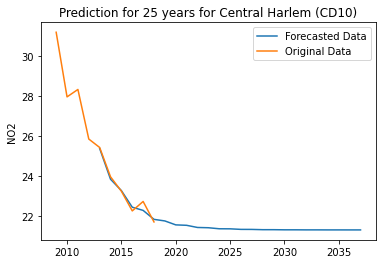

In [ ]:
starting_date = 2009

city_index = 6
indicator = 'NO2'
predict_year = 25
starting_year = 0

if indicator == 'PM2.5':
  max_index = 1
  min_index = 2
  indicator_index = 0
elif indicator == 'NO2':
  max_index = 3
  min_index = 4
  indicator_index = 1
elif indicator == 'O3':
  max_index = 5
  min_index = 6
  indicator_index = 2

max = cities_max_min[city_index][max_index]
min = cities_max_min[city_index][min_index]

test = dataset_original[indicator_index][city_index][starting_year:starting_year+4]

predictions = predict(test,networks[city_index][indicator_index],max,min,predict_year)
print(predictions)



import matplotlib.pyplot as plt
plt.plot(np.arange(starting_date+starting_year+4,starting_date+starting_year+4+predict_year),predictions)
plt.plot(np.arange(starting_date,starting_date+10),dataset_original[indicator_index][city_index])
plt.legend(['Forecasted Data','Original Data'])
plt.title('Prediction for {} years for {}'.format(predict_year,cities_max_min[city_index][0]))
plt.ylabel(indicator)